### HW11
#### 111261022
#### 林品妤

#### Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# === 資料設定 ===
neuron_ids = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
s_a = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]) # 偏好刺激值
sigma = 1.0 # standard deviation

# 每個 Recording 的 Spike Counts
# 對應順序 A(-5) 到 K(5)
n_rec1 = np.array([0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 0])
n_rec2 = np.array([0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0])
n_rec3 = np.array([0, 0, 0, 0, 0, 1, 2, 4, 1, 0, 0])

In [2]:
# ==========================================
# s_ML = sum(spike_count * s_a) / sum(spike_count)
# ==========================================

def calculate_ml(counts, s_vals):
    total_spikes = np.sum(counts)
    if total_spikes == 0: return 0
    return np.sum(counts * s_vals) / total_spikes

# 計算個別 Recording 的 ML
ml_1 = calculate_ml(n_rec1, s_a)
ml_2 = calculate_ml(n_rec2, s_a)
ml_3 = calculate_ml(n_rec3, s_a)

# 計算整體的 ML (先加總所有脈衝)
n_overall = n_rec1 + n_rec2 + n_rec3
ml_overall = calculate_ml(n_overall, s_a)

print("--- Exercise 1 結果 ---")
print(f"Recording 1 ML Estimate: {ml_1}")
print(f"Recording 2 ML Estimate: {ml_2}")
print(f"Recording 3 ML Estimate: {ml_3}")
print(f"Overall ML Estimate: {ml_overall:.4f}")

--- Exercise 1 結果 ---
Recording 1 ML Estimate: 2.125
Recording 2 ML Estimate: 0.25
Recording 3 ML Estimate: 1.625
Overall ML Estimate: 1.3333


#### Exercise 2


--- Exercise 2 結果 (Posterior Mean & Std) ---
After Rec 1: Mean = 2.1085, Std = 0.3522
After Rec 1 & 2: Mean = 1.1829, Std = 0.2495
After Rec 1 & 2 & 3: Mean = 1.3299, Std = 0.2039


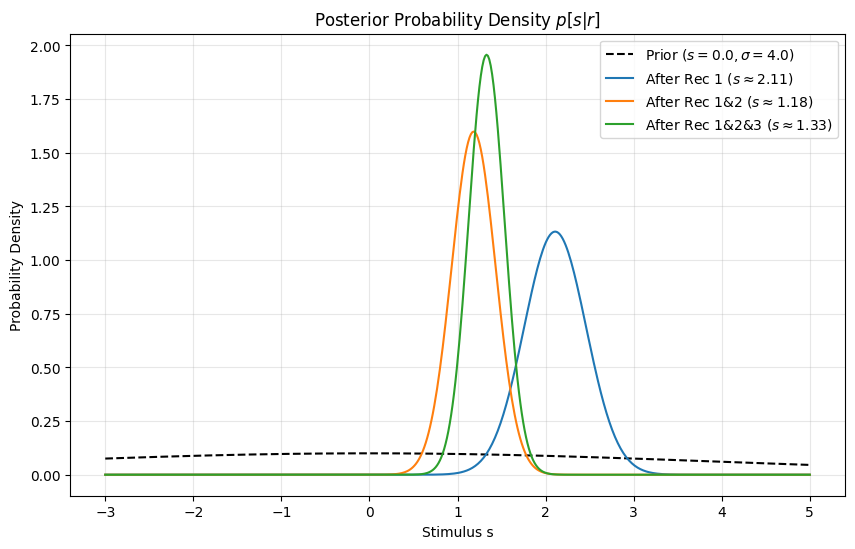

In [3]:
s_prior = 0.0
sigma_prior = 4.0

# 計算後驗分佈參數的函數
# 使用高斯共軛先驗的解析解公式
def calculate_posterior_params(counts, s_vals, sigma_likelihood, s_p, sigma_p):
    # 似然函數部分 (Likelihood term)
    # sum(n_a / sigma^2)
    likelihood_precision = np.sum(counts) / (sigma_likelihood**2)
    # sum(n_a * s_a / sigma^2)
    likelihood_weighted_mean = np.sum(counts * s_vals) / (sigma_likelihood**2)

    # 先驗部分 (Prior term)
    prior_precision = 1 / (sigma_p**2)
    prior_weighted_mean = s_p / (sigma_p**2)

    # 後驗分佈 (Posterior)
    posterior_precision = likelihood_precision + prior_precision
    posterior_mean = (likelihood_weighted_mean + prior_weighted_mean) / posterior_precision
    posterior_std = np.sqrt(1 / posterior_precision)

    return posterior_mean, posterior_std

# 情境 1: After Rec 1
mu_post1, sigma_post1 = calculate_posterior_params(n_rec1, s_a, sigma, s_prior, sigma_prior)

# 情境 2: After Rec 1 & 2
mu_post2, sigma_post2 = calculate_posterior_params(n_rec1 + n_rec2, s_a, sigma, s_prior, sigma_prior)

# 情境 3: After Rec 1 & 2 & 3
mu_post3, sigma_post3 = calculate_posterior_params(n_overall, s_a, sigma, s_prior, sigma_prior)

print("\n--- Exercise 2 結果 (Posterior Mean & Std) ---")
print(f"After Rec 1: Mean = {mu_post1:.4f}, Std = {sigma_post1:.4f}")
print(f"After Rec 1 & 2: Mean = {mu_post2:.4f}, Std = {sigma_post2:.4f}")
print(f"After Rec 1 & 2 & 3: Mean = {mu_post3:.4f}, Std = {sigma_post3:.4f}")

# 繪圖
s_grid = np.linspace(-3, 5, 500)
pdf_prior = norm.pdf(s_grid, loc=s_prior, scale=sigma_prior)
pdf_post1 = norm.pdf(s_grid, loc=mu_post1, scale=sigma_post1)
pdf_post2 = norm.pdf(s_grid, loc=mu_post2, scale=sigma_post2)
pdf_post3 = norm.pdf(s_grid, loc=mu_post3, scale=sigma_post3)

plt.figure(figsize=(10, 6))
plt.plot(s_grid, pdf_prior, 'k--', label=f'Prior ($s={s_prior}, \sigma={sigma_prior}$)')
plt.plot(s_grid, pdf_post1, label=f'After Rec 1 ($s\\approx{mu_post1:.2f}$)')
plt.plot(s_grid, pdf_post2, label=f'After Rec 1&2 ($s\\approx{mu_post2:.2f}$)')
plt.plot(s_grid, pdf_post3, label=f'After Rec 1&2&3 ($s\\approx{mu_post3:.2f}$)')

plt.title('Posterior Probability Density $p[s|r]$')
plt.xlabel('Stimulus s')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()